In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


df = pd.read_csv(r'/kaggle/input/student-performance1/Student_Performance.csv')
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [2]:
columns_remove = ['Extracurricular Activities', 'Sleep Hours']
original_df = df.drop(columns = columns_remove)

In [3]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
# remove Outliers

q1 = original_df.quantile(0.25)
q3 = original_df.quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df_cleaned = original_df[~((original_df < lower_bound) | (original_df > upper_bound)).any(axis=1)]

print("Size before removing outliers:", original_df.shape)
print("Size after removing outliers:", df_cleaned.shape)


Size before removing outliers: (10000, 4)
Size after removing outliers: (10000, 4)


In [5]:
# No outliers are present
print(df_cleaned.shape)
x = np.array(df_cleaned.drop(columns = ['Performance Index']))
y = np.array(df_cleaned['Performance Index'])

print(x.shape)

(10000, 4)
(10000, 3)


In [6]:
x_mean = x.mean(axis = 0)
x_std = x.std(axis = 0)
x_norm = (x - x_mean) / x_std

# y_mean = y.mean(axis = 0)
# y_std = y.std(axis = 0)
# y_norm = (y - y_mean) / y_std

In [7]:
def compute_cost(w, x, y, b, lamda):
    m = len(x)
    
    # formula = 1 / 2m ∑ (predicted - actual) ** 2
    total_cost = 0
    for i in range(m):
        prediction = np.dot(w, x[i]) + b
        total_cost += (prediction - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    
    # should be scalar output
    reg = 0
    n = len(w)
    for j in range(n):
        reg += w[j] ** 2

    reg = lamda / (2 * m) * reg

    return total_cost + reg

In [8]:
def compute_cost1(w, x, y, b):
    m = len(x)
    # formula = 1 / 2m ∑ (predicted - actual) ** 2
    total_cost = 0
    for i in range(m):
        prediction = np.dot(w, x[i]) + b
        total_cost += (prediction - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    return total_cost

In [9]:
def compute_gradient(w, x, y, b):

    # formula = w  - alpha (dj / dw) * x
    # b = b - alpha (db / db)
    m = len(x)
    dw = np.zeros_like(w)
    db = 0

    for i in range(m):
        prediction = np.dot(w, x[i]) + b
        dw += (prediction -  y[i]) * x[i]
        db += (prediction -  y[i])

        
    dw /= m
    db /= m

    return dw, db

In [10]:
import math
def gradient_descent(alpha, w, x, b, y,iterations):
    # formula = w  - alpha (dj / dw) * x
    # b = b - alpha (dj / db)

    J = []
    # cost function output should be scalar
    prev_cost=compute_cost1(w,x,y,b)
    print("prev", prev_cost)
    for i in range(iterations):

        dw, db = compute_gradient(w, x, y, b)

        w = w - alpha * dw
        b = b - alpha * db
        curr_cost=compute_cost1(w,x,y,b)
        if i % 100 == 0 :
            J.append(curr_cost)
            print(f"Iteration {i:4}: Cost {(J[-1]):8.6f}")
        if(abs(prev_cost-curr_cost)<1e-7):
            break
        prev_cost=curr_cost
    return w,b, J

initial_w = [0.3, 0.7, 0.4]
initial_b = 0.40
alpha = 0.01
w,b,cost = gradient_descent(alpha, initial_w, x_norm, initial_b, y, 
                     2000)

# we have 6 features, so 6 weights and bias
print("w found by gradient descent:", w)
print("b found : ", b)


prev 1672.9997222321563
Iteration    0: Cost 1639.783288
Iteration  100: Cost 222.202877
Iteration  200: Cost 31.947199
Iteration  300: Cost 6.409071
Iteration  400: Cost 2.980568
Iteration  500: Cost 2.520219
Iteration  600: Cost 2.458397
Iteration  700: Cost 2.450094
Iteration  800: Cost 2.448978
Iteration  900: Cost 2.448828
w found by gradient descent: [ 7.38854674 17.6683918   0.56298071]
b found :  55.22187697474924


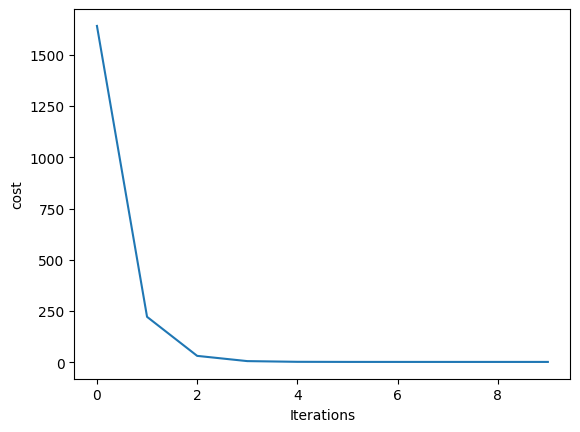

In [11]:
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.show()

In [12]:
feature_names = original_df.drop(columns=['Performance Index']).columns
print(feature_names)

Index(['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced'], dtype='object')


In [13]:
df.head(6)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0


In [14]:
# New data (before normalization)
new_data = np.array([5, 52, 2])

# Normalize the new data using the same max values as the training data

new_norm = (new_data - x_mean) / x_std  # Use max values from training data for consistency

print("Normalized new data:", new_norm)

print(w)

# Now make the prediction using the normalized new data
predicted_price = np.dot(w, new_norm) + b
print(f"Performance Index: {predicted_price}")


Normalized new data: [ 0.00274218 -1.00596317 -0.90098215]
[ 7.38854674 17.6683918   0.56298071]
Performance Index: 36.96115078098644


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(x, y)

LinearRegression()

In [18]:
regression.coef_

array([2.85381923, 1.01885968, 0.1963031 ])

In [19]:
regression.predict([[5, 52, 2]])

array([36.96323191])

In [20]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model with a specific alpha value
ridge_model = Ridge()

# Fit the model to your data
ridge_model.fit(x, y)


Ridge()

In [21]:
ridge_model.predict([[4, 82, 2]])

array([64.67524464])